In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pltc
import glob
import bbknn
from pandas.core.index import RangeIndex
from matplotlib import rcParams

/opt/conda/envs/hub_v2/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  import sys


In [2]:
sc.settings.verbosity = 3   
sc.logging.print_header() 
sc.settings.set_figure_params(dpi=80) 

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.2


In [3]:
VE24AmIs_subset_batchcorrected = sc.read('./VE24AmIs_subset_batchcorrected.h5ad')

In [4]:
marker_genes = ['Epcam', 'Krt8','Krt19','Vim','Pdgfra','Twist2', 'Sprr2f',
                'Acta2', 'Myh11','Foxj1', 'Ccdc153', 'Ovgp1','Wt1','Serpina1e','S100g','Pecam1',
                 ]

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`


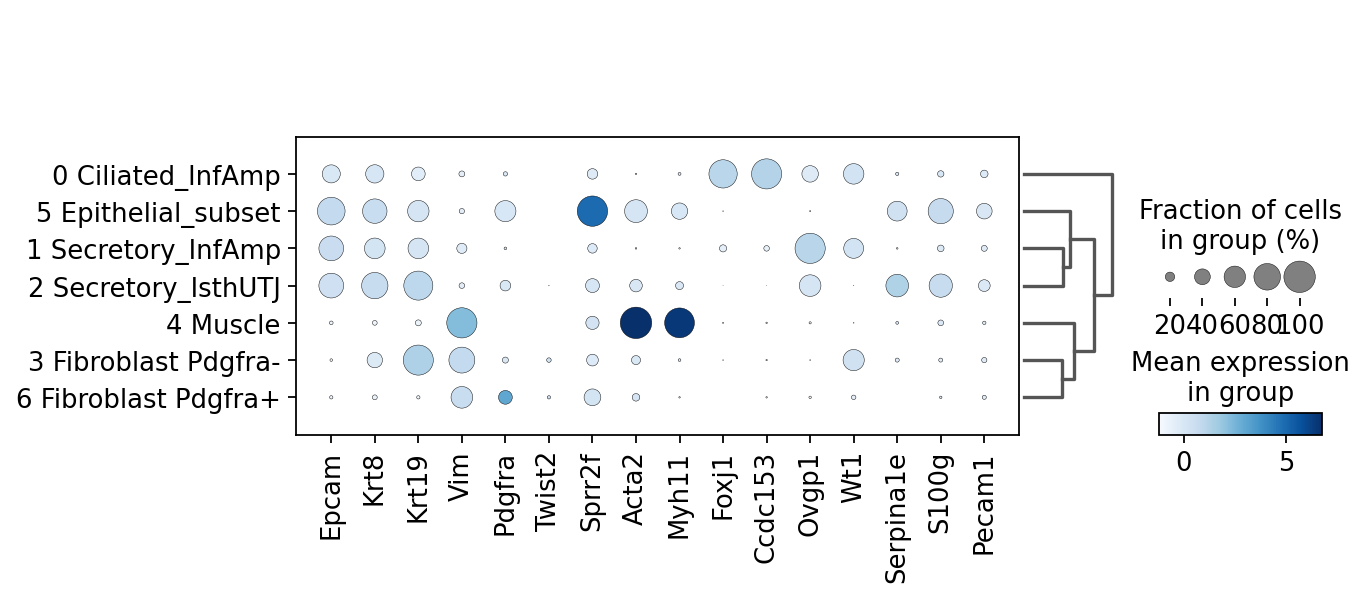

In [5]:
ax = sc.pl.dotplot(VE24AmIs_subset_batchcorrected, 
                   marker_genes, groupby='leiden', dendrogram=True, color_map='Blues',
                  save='_Fig. S2A')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


/opt/conda/envs/hub_v2/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


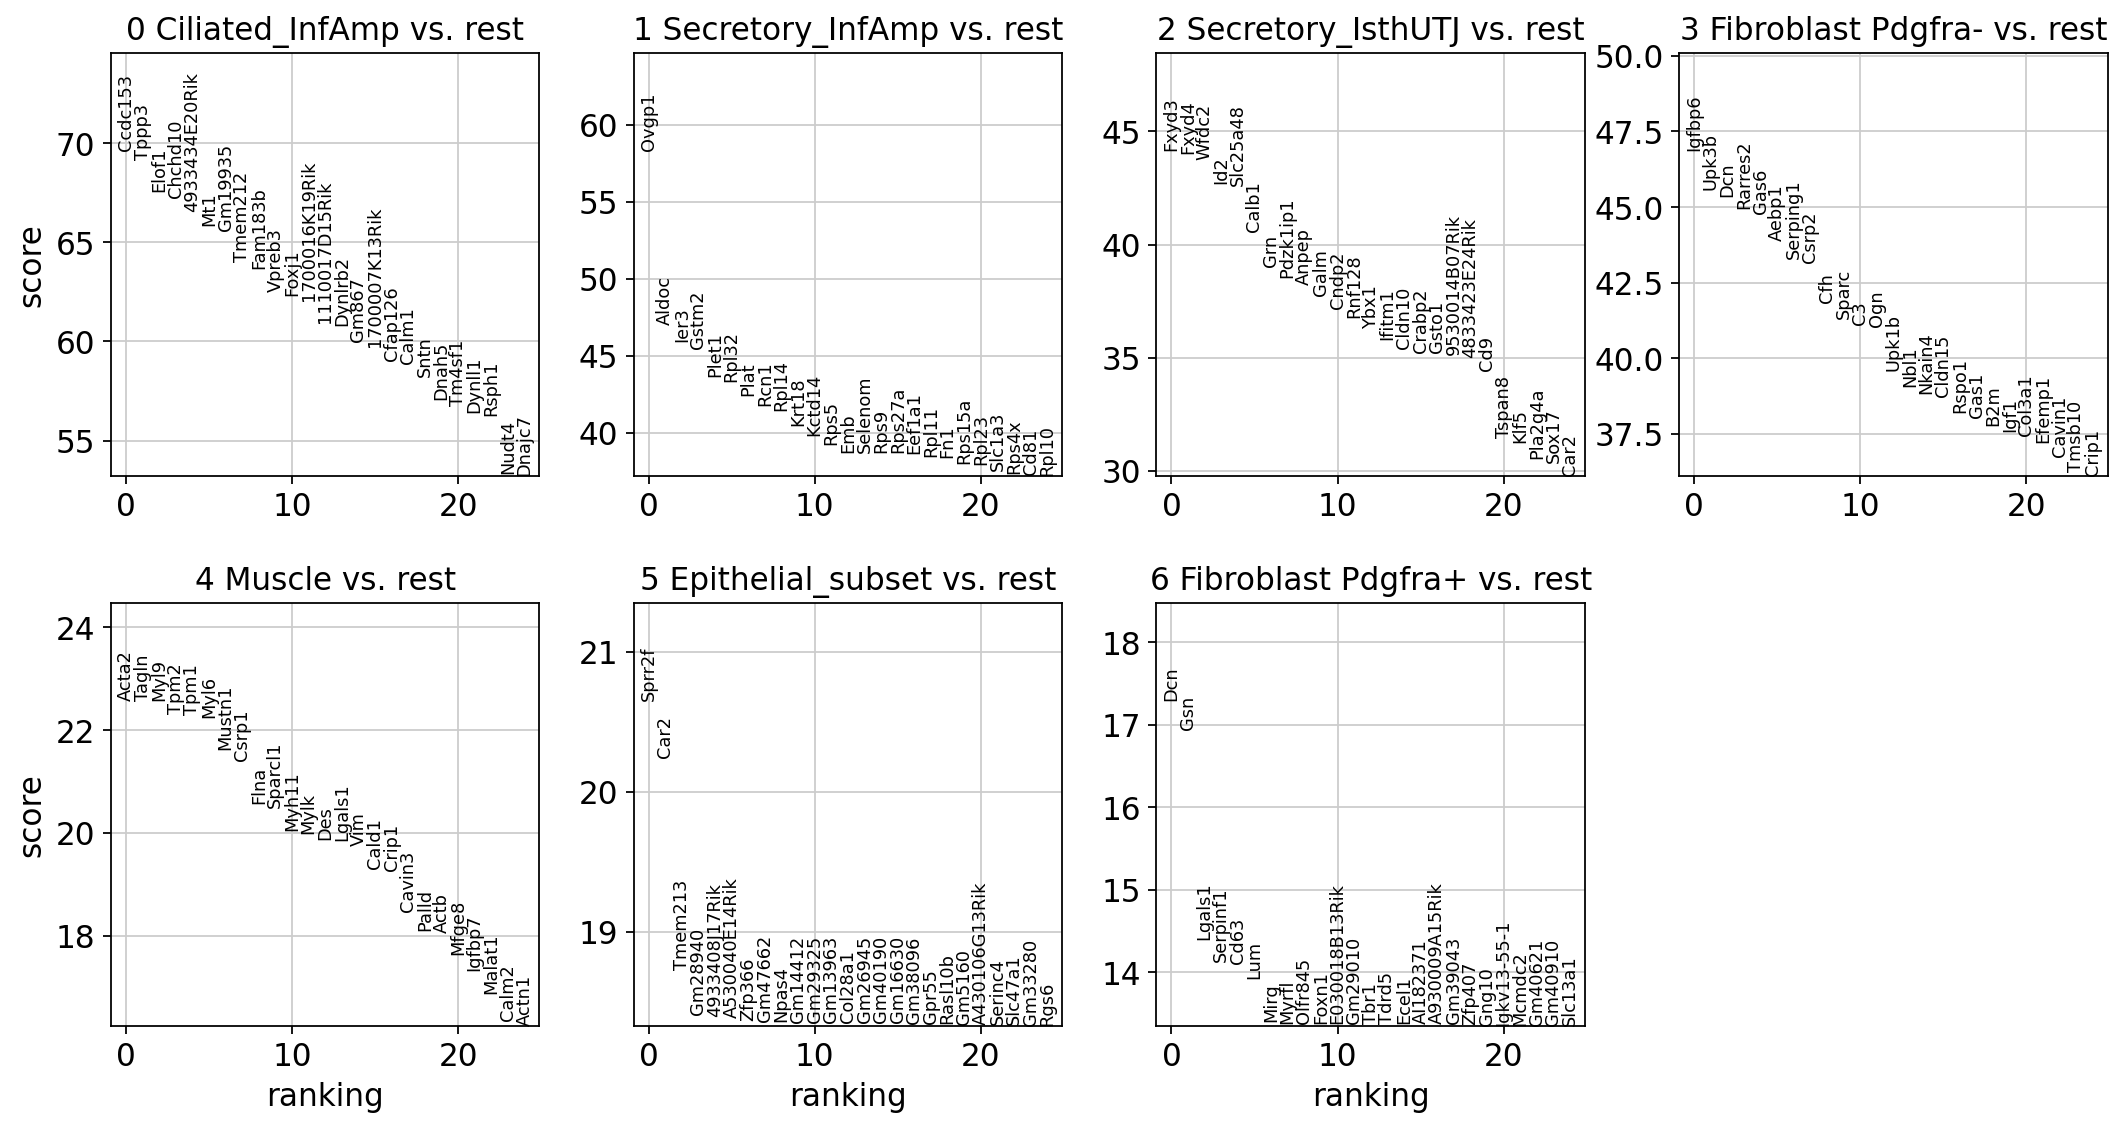

0 Ciliated_InfAmp 1 Secretory_InfAmp 2 Secretory_IsthUTJ  \
0           Ccdc153              Ovgp1               Fxyd3   
1             Tppp3              Aldoc               Fxyd4   
2             Elof1               Ier3               Wfdc2   
3           Chchd10              Gstm2                 Id2   
4     4933434E20Rik              Plet1            Slc25a48   
5               Mt1              Rpl32               Calb1   
6           Gm19935               Plat                 Grn   
7           Tmem212               Rcn1            Pdzk1ip1   
8           Fam183b              Rpl14               Anpep   
9            Vpreb3              Krt18                Galm   

  3 Fibroblast Pdgfra- 4 Muscle 5 Epithelial_subset 6 Fibroblast Pdgfra+  
0               Igfbp6    Acta2              Sprr2f                  Dcn  
1                Upk3b    Tagln                Car2                  Gsn  
2                  Dcn     Myl9             Tmem213               Lgals1  
3              Rarres2     Tpm2             Gm28940             Serpinf1  
4                 Gas6     Tpm1       4933408J17Rik                 Cd63  
5                Aebp1     Myl6       A530040E14Rik                  Lum  
6             Serping1   Mustn1              Zfp366                 Mirg  
7                Csrp2    Csrp1             Gm47662                Myrfl  
8                  Cfh     Flna               Npas4              Olfr845  
9                Sparc  Sparcl1             Gm14412                Foxn1

In [6]:
sc.tl.rank_genes_groups(VE24AmIs_subset_batchcorrected, 'leiden', method='wilcoxon',n_genes=25)
sc.pl.rank_genes_groups(VE24AmIs_subset_batchcorrected, n_genes=25, sharey=False)
pd.DataFrame(VE24AmIs_subset_batchcorrected.uns['rank_genes_groups']['names']).head(10)

In [7]:
result = VE24AmIs_subset_batchcorrected.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(100)

0 Ciliated_InfAmp_n  0 Ciliated_InfAmp_p 1 Secretory_InfAmp_n  \
0              Ccdc153                  0.0                Ovgp1   
1                Tppp3                  0.0                Aldoc   
2                Elof1                  0.0                 Ier3   
3              Chchd10                  0.0                Gstm2   
4        4933434E20Rik                  0.0                Plet1   
5                  Mt1                  0.0                Rpl32   
6              Gm19935                  0.0                 Plat   
7              Tmem212                  0.0                 Rcn1   
8              Fam183b                  0.0                Rpl14   
9               Vpreb3                  0.0                Krt18   
10               Foxj1                  0.0               Kctd14   
11       1700016K19Rik                  0.0                 Rps5   
12       1110017D15Rik                  0.0                  Emb   
13             Dynlrb2                  0.0              Selenom   
14               Gm867                  0.0                 Rps9   
15       1700007K13Rik                  0.0               Rps27a   
16             Cfap126                  0.0               Eef1a1   
17               Calm1                  0.0                Rpl11   
18                Sntn                  0.0                  Fn1   
19               Dnah5                  0.0               Rps15a   
20              Tm4sf1                  0.0                Rpl23   
21              Dynll1                  0.0               Slc1a3   
22               Rsph1                  0.0                Rps4x   
23               Nudt4                  0.0                 Cd81   
24              Dnajc7                  0.0                Rpl10   

    1 Secretory_InfAmp_p 2 Secretory_IsthUTJ_n  2 Secretory_IsthUTJ_p  \
0           0.000000e+00                 Fxyd3           0.000000e+00   
1           0.000000e+00                 Fxyd4           0.000000e+00   
2           0.000000e+00                 Wfdc2           0.000000e+00   
3           0.000000e+00                   Id2           0.000000e+00   
4           0.000000e+00              Slc25a48           0.000000e+00   
5           0.000000e+00                 Calb1           0.000000e+00   
6           0.000000e+00                   Grn           0.000000e+00   
7           0.000000e+00              Pdzk1ip1           0.000000e+00   
8           0.000000e+00                 Anpep           0.000000e+00   
9           0.000000e+00                  Galm           0.000000e+00   
10          0.000000e+00                 Cndp2          1.162740e-302   
11          0.000000e+00                Rnf128          6.992786e-296   
12          0.000000e+00                  Ybx1          1.083923e-288   
13          0.000000e+00                Ifitm1          8.755976e-281   
14          0.000000e+00                Cldn10          1.787740e-274   
15          0.000000e+00                Crabp2          3.976703e-272   
16          0.000000e+00                 Gsto1          1.012922e-271   
17          0.000000e+00         9530014B07Rik          1.079963e-270   
18          0.000000e+00         4833423E24Rik          3.636022e-268   
19          0.000000e+00                   Cd9          1.691525e-259   
20          0.000000e+00                Tspan8          1.462460e-217   
21         3.592894e-308                  Klf5          1.295861e-214   
22         5.410771e-306               Pla2g4a          8.545652e-205   
23         6.170443e-305                 Sox17          1.029972e-202   
24         4.420101e-303                  Car2          7.815675e-195   

   3 Fibroblast Pdgfra-_n  3 Fibroblast Pdgfra-_p 4 Muscle_n     4 Muscle_p  \
0                  Igfbp6            0.000000e+00      Acta2  6.339328e-113   
1                   Upk3b            0.000000e+00      Tagln  6.742042e-113   
2                     Dcn            0.000000e+00       Myl9  7.063533e-113   
3                 R

In [8]:
Df_Pvalue = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
for group in groups for key in ['names', 'pvals']})

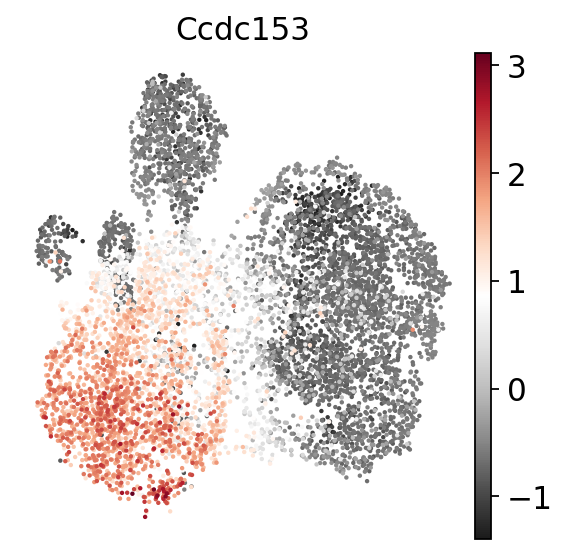

In [9]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Ccdc153', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B0.pdf')

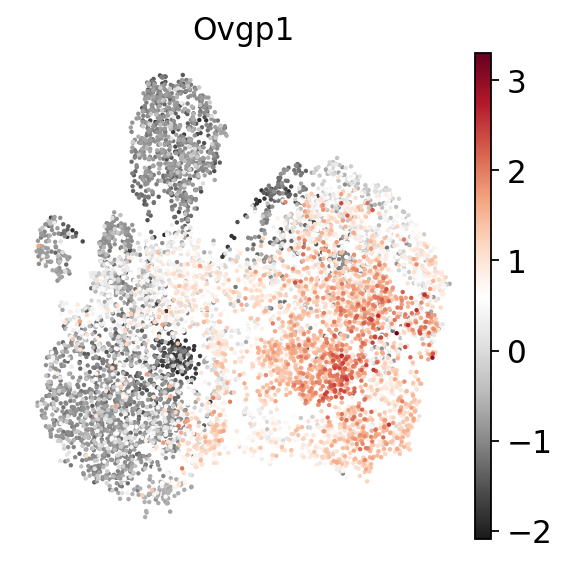

In [10]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Ovgp1', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B1.pdf')

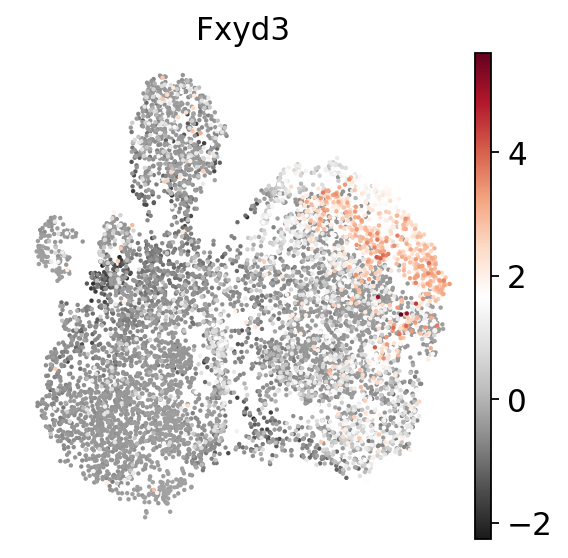

In [11]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Fxyd3', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B2.pdf')

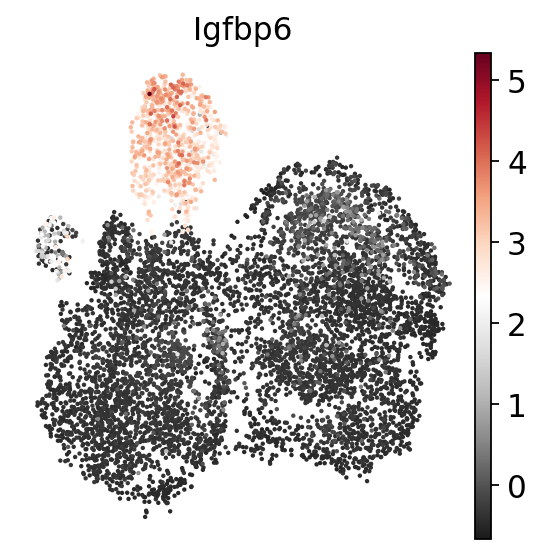

In [12]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Igfbp6', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B3.pdf')

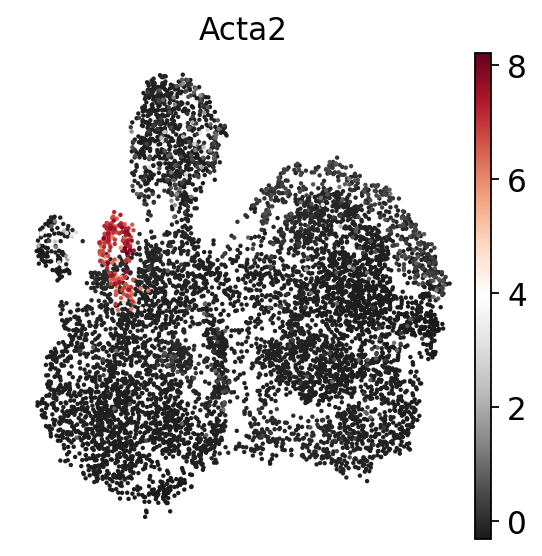

In [13]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Acta2', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B4.pdf')

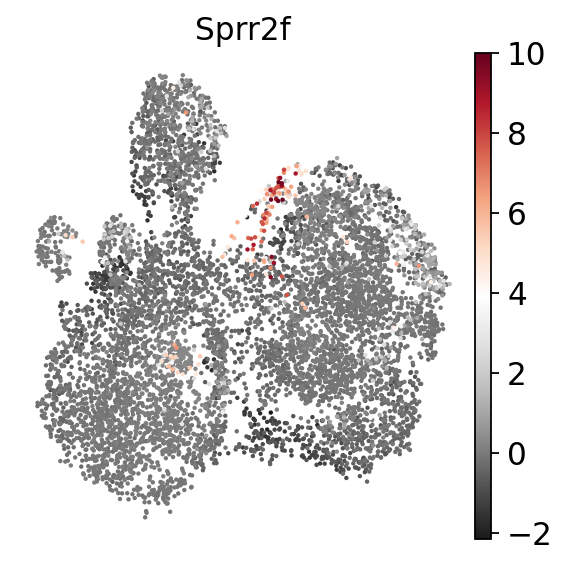

In [14]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Sprr2f', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B5.pdf')

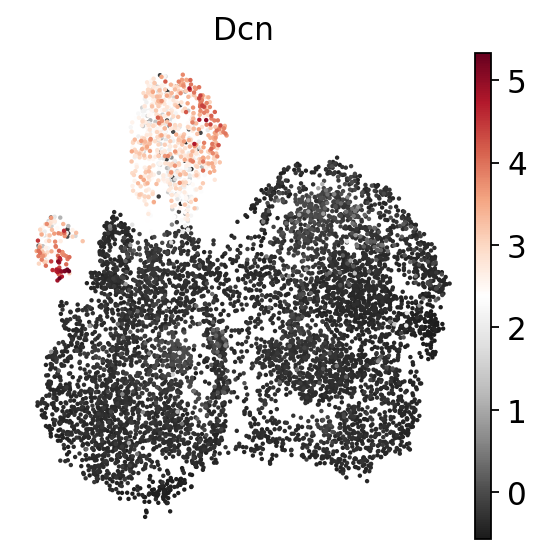

In [15]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Dcn', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B6.pdf')

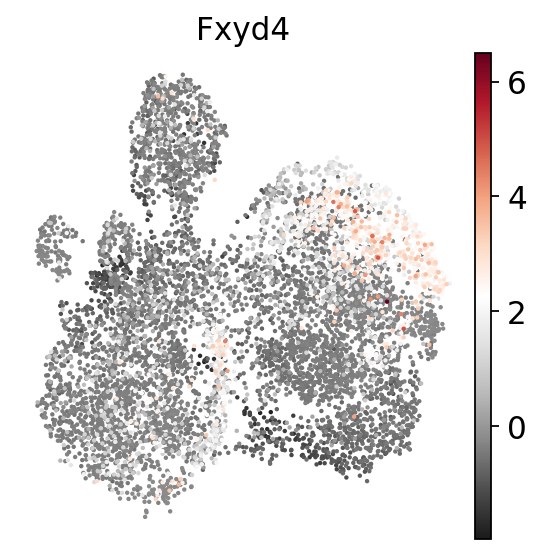

In [16]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Fxyd4', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B9.pdf')

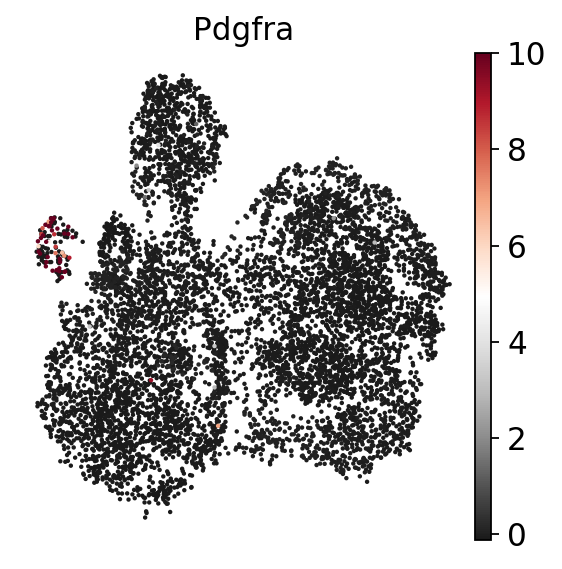

In [17]:
sc.pl.umap(VE24AmIs_subset_batchcorrected, color='Pdgfra', 
           frameon=False, color_map='RdGy_r',
          save='_Fig 2B8.pdf')

In [18]:
Df_Pvalue.to_csv('TableS1_Df_Pvalue_VvsE_top25genesforeachcluster.csv')

In [19]:
VE24AmIs_subset_batchcorrected.obs['leiden'].cat.categories

Index(['0 Ciliated_InfAmp', '1 Secretory_InfAmp', '2 Secretory_IsthUTJ',
       '3 Fibroblast Pdgfra-', '4 Muscle', '5 Epithelial_subset',
       '6 Fibroblast Pdgfra+'],
      dtype='object')

In [20]:
VE24AmIs_subset_batchcorrected.obs['leiden_anno'] = VE24AmIs_subset_batchcorrected.obs['leiden']
VE24AmIs_subset_batchcorrected.obs['leiden_anno'].cat.categories = [
    '0 Ciliated_InfAmp', 
    '1 Secretory_InfAmp', 
    '2 Secretory_IsthUTJ',
    '3 Fibroblast Pdgfra-', 
    '4 Muscle', 
    '5 Epithelial_subset',
       '6 Fibroblast Pdgfra+'
]

In [21]:
!pwd

/home/scrna/data/VE24AmIs


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_anno']`


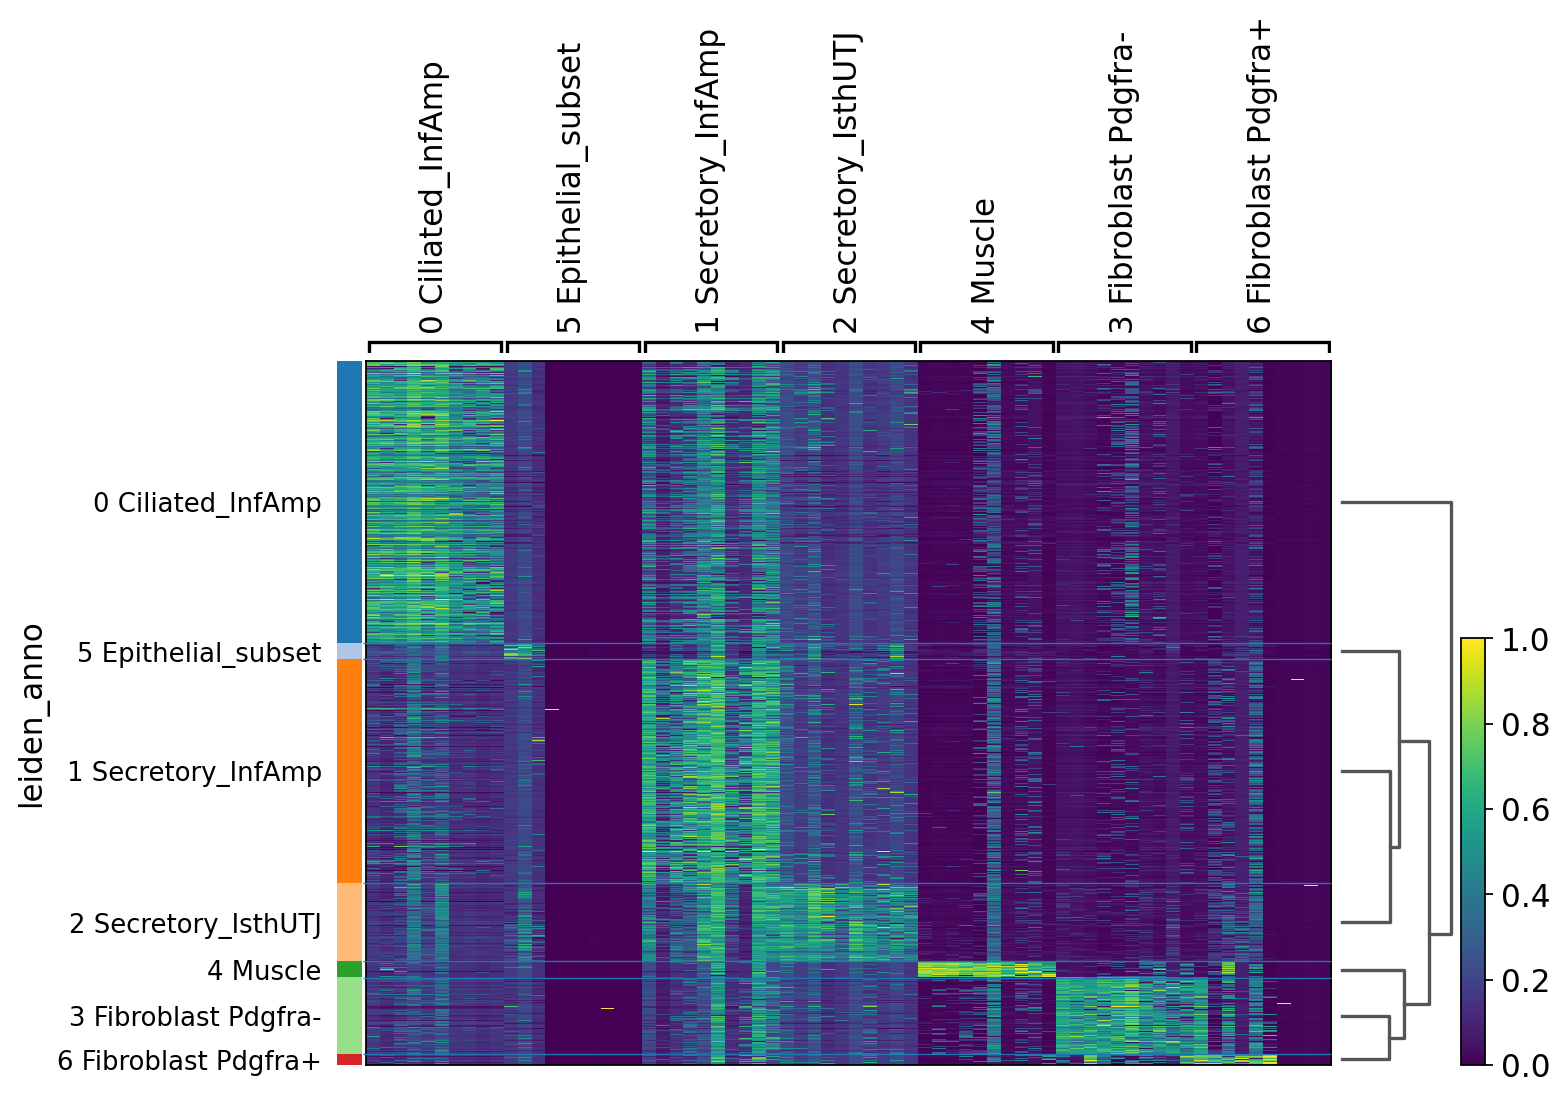

In [22]:
sc.pl.rank_genes_groups_heatmap(VE24AmIs_subset_batchcorrected, n_genes=10,
                                standard_scale='var',
                                groupby='leiden_anno',
                               save='Merged_subset_batchcorrected_Heatmap Leiden Ranked Genes')

In [23]:
VE24AmIs_subset_batchcorrected

AnnData object with n_obs × n_vars = 7612 × 18334
    obs: 'Clusters', 'Region', 'Treatment', '_X', '_Y', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'leiden_anno'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Region_colors', 'Treatment_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', "dendrogram_['leiden']", 'rank_genes_groups', 'dendrogram_leiden_anno'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [24]:
VE24AmIs_subset_batchcorrected.write('./VE24AmIs_subset_batchcorrected_analyzed.h5ad')

In [25]:
VE24AmIs_subset_batchcorrected = sc.read('./VE24AmIs_subset_batchcorrected_analyzed.h5ad')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


/opt/conda/envs/hub_v2/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


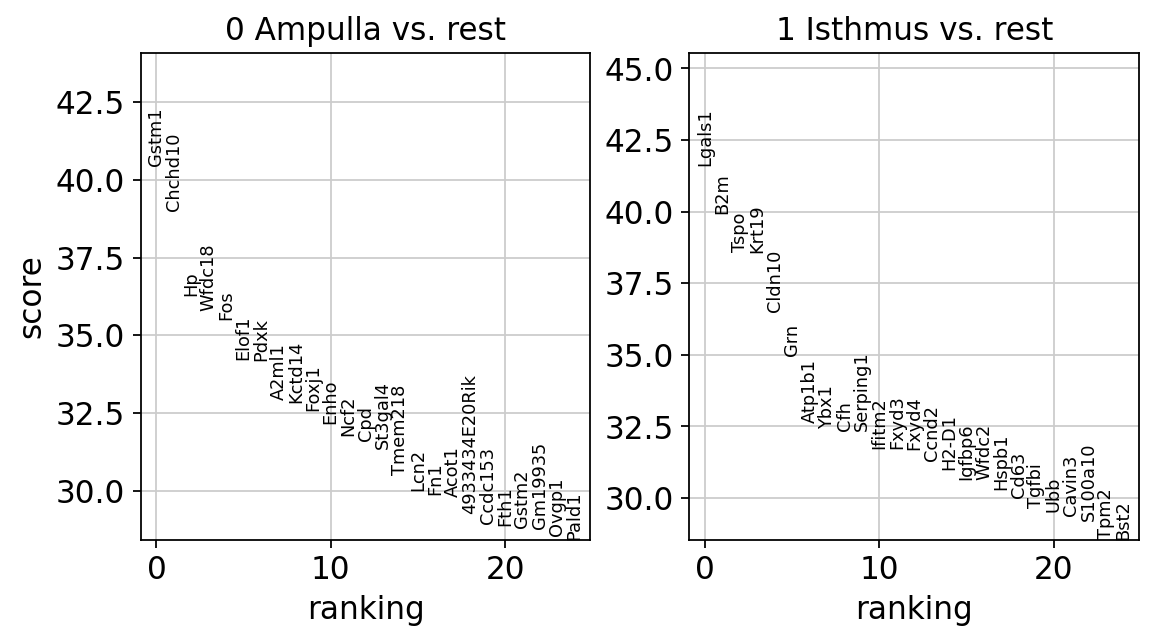

0 Ampulla 1 Isthmus
0     Gstm1    Lgals1
1   Chchd10       B2m
2        Hp      Tspo
3    Wfdc18     Krt19
4       Fos    Cldn10
5     Elof1       Grn
6      Pdxk    Atp1b1
7     A2ml1      Ybx1
8    Kctd14       Cfh
9     Foxj1  Serping1

In [26]:
sc.tl.rank_genes_groups(VE24AmIs_subset_batchcorrected, 'Region', method='wilcoxon',n_genes=500)
sc.pl.rank_genes_groups(VE24AmIs_subset_batchcorrected, n_genes=25, sharey=False)
pd.DataFrame(VE24AmIs_subset_batchcorrected.uns['rank_genes_groups']['names']).head(10)

In [27]:
result = VE24AmIs_subset_batchcorrected.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(100)

0 Ampulla_n    0 Ampulla_p    1 Isthmus_n    1 Isthmus_p
0        Gstm1   0.000000e+00         Lgals1   0.000000e+00
1      Chchd10   0.000000e+00            B2m   0.000000e+00
2           Hp  3.576599e-288           Tspo   0.000000e+00
3       Wfdc18  2.669925e-280          Krt19   0.000000e+00
4          Fos  4.277123e-276         Cldn10  1.744724e-291
..         ...            ...            ...            ...
95     Gm31881  2.499222e-135       Tmem229a  1.051094e-134
96      Apol7d  2.534438e-135         Trim66  1.134648e-134
97     Gm42791  2.805616e-135       BC023719  1.168932e-134
98      Nudt10  3.312720e-135  A830082K12Rik  1.183506e-134
99     Gm35911  3.895711e-135         Rnf135  1.210095e-134

[100 rows x 4 columns]

In [28]:
Df_Pvalue = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
for group in groups for key in ['names', 'pvals']})

In [29]:
Df_Pvalue.to_csv('TableS2_Df_Pvalue_VvsE_all7Clusters_AmpvsIsth_Top500.csv')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


/opt/conda/envs/hub_v2/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


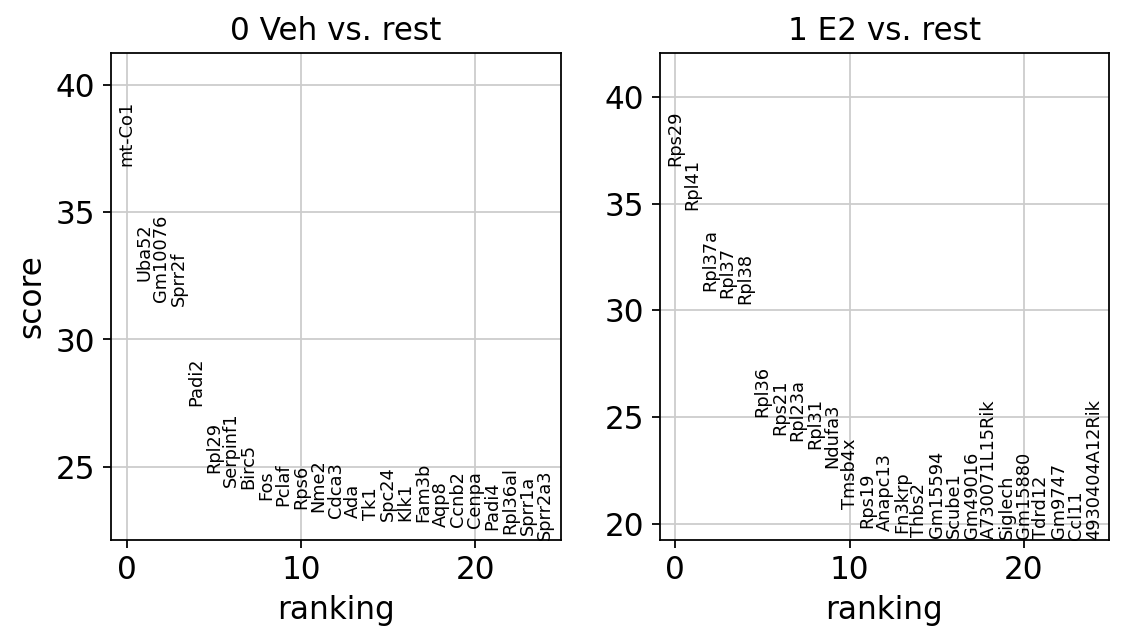

0 Veh    1 E2
0    mt-Co1   Rps29
1     Uba52   Rpl41
2   Gm10076  Rpl37a
3    Sprr2f   Rpl37
4     Padi2   Rpl38
5     Rpl29   Rpl36
6  Serpinf1   Rps21
7     Birc5  Rpl23a
8       Fos   Rpl31
9     Pclaf  Ndufa3

In [30]:
sc.tl.rank_genes_groups(VE24AmIs_subset_batchcorrected, 'Treatment', method='wilcoxon',n_genes=500)
sc.pl.rank_genes_groups(VE24AmIs_subset_batchcorrected, n_genes=25, sharey=False)
pd.DataFrame(VE24AmIs_subset_batchcorrected.uns['rank_genes_groups']['names']).head(10)

In [31]:
result = VE24AmIs_subset_batchcorrected.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(100)

0 Veh_n        0 Veh_p   1 E2_n         1 E2_p
0    mt-Co1  3.420295e-297    Rps29  2.784336e-296
1     Uba52  8.542508e-229    Rpl41  3.409326e-264
2   Gm10076  9.769308e-218   Rpl37a  6.499835e-210
3    Sprr2f  3.850018e-215    Rpl37  1.114749e-205
4     Padi2  4.394397e-165    Rpl38  6.760355e-202
..      ...            ...      ...            ...
95    Cdca2   3.652681e-91  Gm40348   8.601293e-81
96   Sel1l3   5.174541e-91    Trub2   9.581396e-81
97    Cdca5   5.245961e-91   Gm5160   9.721687e-81
98   Incenp   6.645247e-91   Ipcef1   1.046303e-80
99    Kifc1   6.685832e-91     Rgs6   1.076388e-80

[100 rows x 4 columns]

In [32]:
Df_Pvalue = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
for group in groups for key in ['names', 'pvals']})

In [33]:
Df_Pvalue.to_csv('TableS2_Df_Pvalue_VvsE_all7Clusters_VvsE_Top500.csv')

In [34]:
VE24AmIs_subset_batchcorrected.obs['leiden_anno'] = VE24AmIs_subset_batchcorrected.obs['leiden']
VE24AmIs_subset_batchcorrected.obs['leiden_anno'].cat.categories = [
    '0 Ciliated_InfAmp',
    '1 Secretory_InfAmp',
    '2 Secretory_IsthUTJ',
    '3 Fibroblast Pdgfra-',
    '4 Muscle',
    '5 Epithelial_subset',
    '6 Fibroblast Pdgfra+']

Genes in protease family

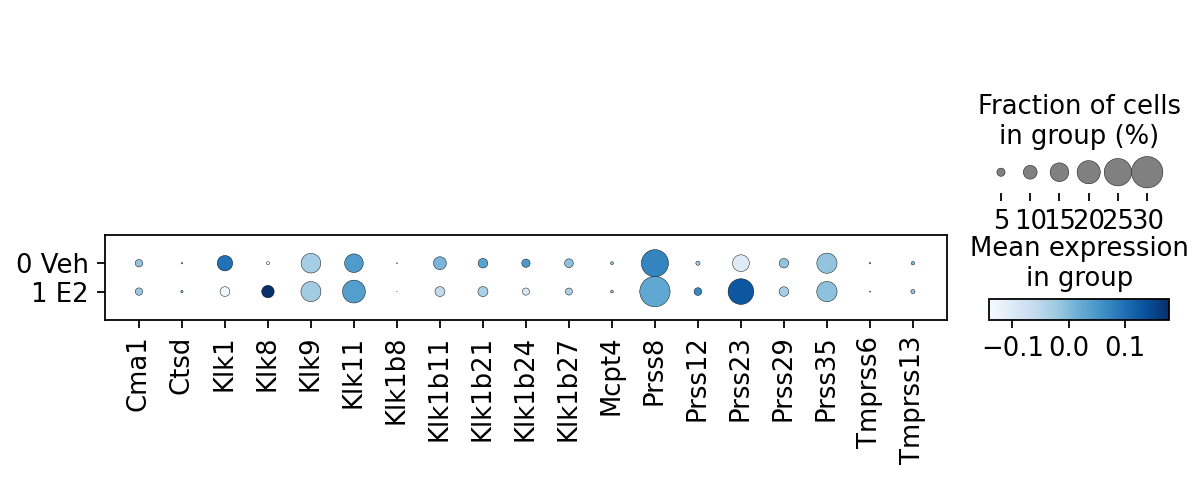

In [35]:
sc.pl.dotplot(VE24AmIs_subset_batchcorrected, ['Cma1', 'Ctsd', 'Klk1', 'Klk8', 'Klk9', 'Klk11', 'Klk1b8', 
                                               'Klk1b11', 'Klk1b21', 'Klk1b24', 'Klk1b27', 
                                               'Mcpt4', 'Prss8', 'Prss12', 'Prss23', 'Prss29', 'Prss35', 
                                              'Tmprss6', 'Tmprss13'], 
groupby='Treatment',color_map='Blues',
             save='_Fig S3A.pdf')

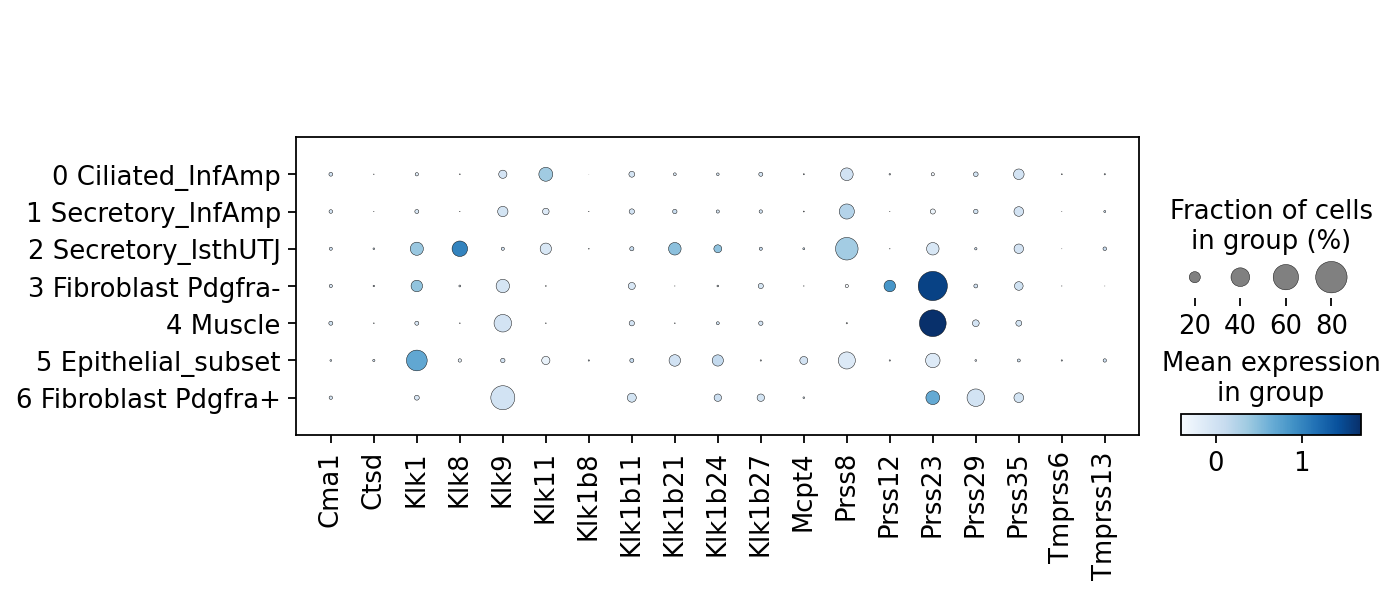

In [36]:
sc.pl.dotplot(VE24AmIs_subset_batchcorrected, ['Cma1', 'Ctsd', 'Klk1', 'Klk8', 'Klk9', 'Klk11', 'Klk1b8', 
                                               'Klk1b11', 'Klk1b21', 'Klk1b24', 'Klk1b27', 
                                               'Mcpt4', 'Prss8', 'Prss12', 'Prss23', 'Prss29', 'Prss35', 
                                              'Tmprss6', 'Tmprss13'], 
groupby='leiden_anno', color_map='Blues',
             save='_Fig S3B.pdf')

Genes in protease inhibitor family

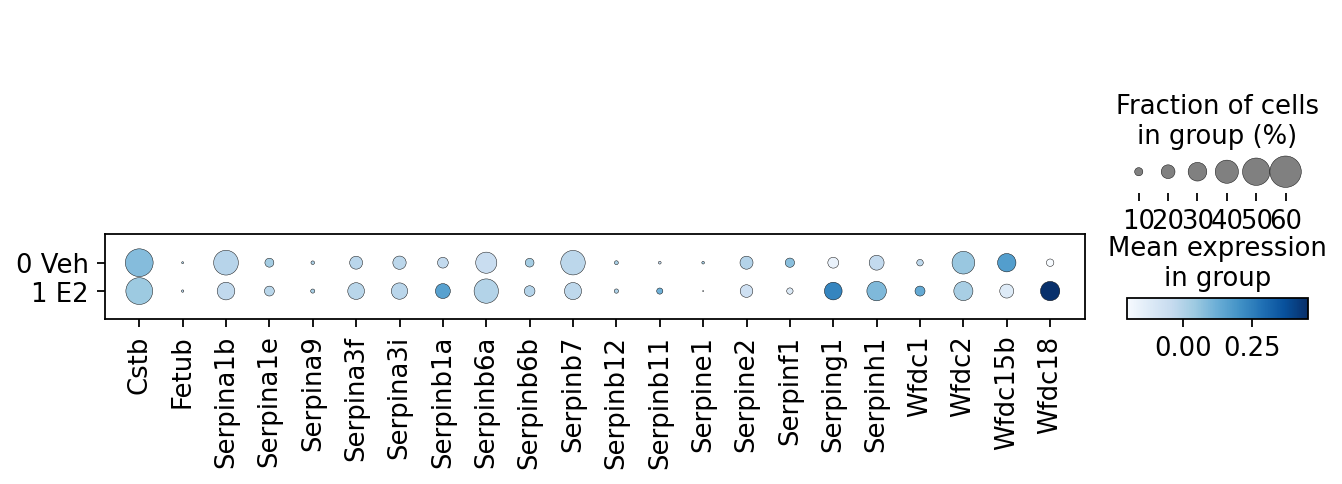

In [37]:
sc.pl.dotplot(VE24AmIs_subset_batchcorrected, ['Cstb', 'Fetub', 'Serpina1b', 'Serpina1e', 'Serpina9', 'Serpina3f', 'Serpina3i',
                                               'Serpinb1a', 'Serpinb6a', 'Serpinb6b', 'Serpinb7', 'Serpinb12', 'Serpinb11', 'Serpine1', 'Serpine2',
                                               'Serpinf1', 'Serping1', 'Serpinh1',
                                               'Wfdc1', 'Wfdc2', 'Wfdc15b', 'Wfdc18'],
groupby='Treatment', color_map='Blues',
             save='_Fig S3C.pdf')

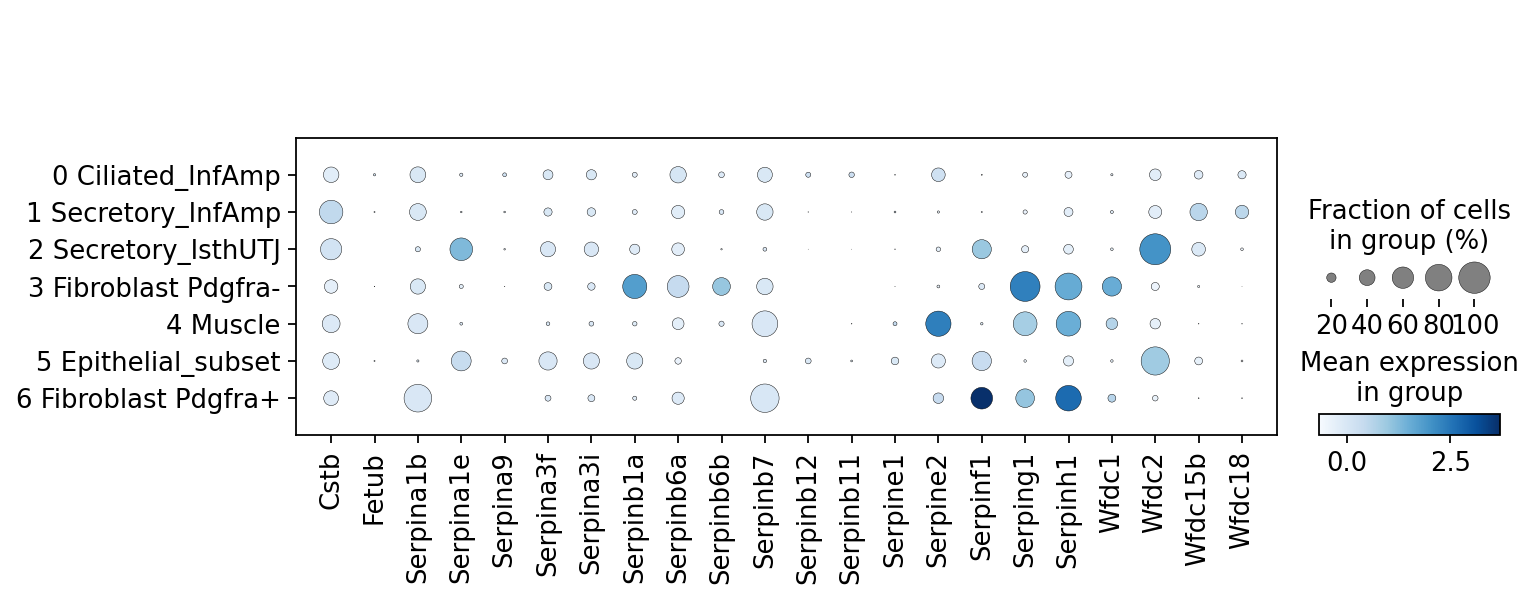

In [38]:
sc.pl.dotplot(VE24AmIs_subset_batchcorrected, ['Cstb', 'Fetub', 'Serpina1b', 'Serpina1e', 'Serpina9', 'Serpina3f', 'Serpina3i',
                                               'Serpinb1a', 'Serpinb6a', 'Serpinb6b', 'Serpinb7', 'Serpinb12', 'Serpinb11', 'Serpine1', 'Serpine2',
                                               'Serpinf1', 'Serping1', 'Serpinh1',
                                               'Wfdc1', 'Wfdc2', 'Wfdc15b', 'Wfdc18'],
groupby='leiden_anno', color_map='Blues',
             save='_Fig S3D.pdf')